# Include Librabries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Import dataset

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
train.shape

(1460, 81)

# Handle Missing Values

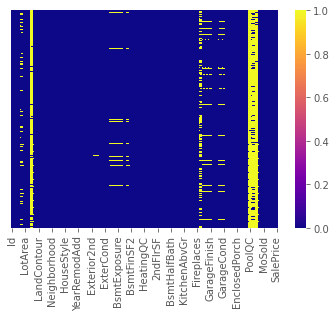

In [56]:
sns.heatmap(train.isnull(),yticklabels=False, cmap='plasma')

In [57]:
train.isnull().sum().sort_values(ascending=False)[0:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [58]:
test.isnull().sum().sort_values(ascending=False)[0:33]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

 **- LonFrontage**

In [59]:
train.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [60]:
train.LotFrontage.isnull().sum()

259

In [61]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())

In [62]:
test.LotFrontage.isnull().sum()

227

In [63]:
test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

**- Alley**

In [64]:
train.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [65]:
train.drop(columns=['Alley'], inplace=True)

In [66]:
test.Alley.value_counts(dropna=False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [67]:
test.drop(columns=['Alley'], inplace=True)

**- BsmtCond, BsmtQual, FirePlaceQu, GarageType, GarageCond, GarageFinish, GarageQual**

In [68]:
train.BsmtCond.value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [69]:
train['BsmtCond'] = train['BsmtCond'].fillna(train.BsmtCond.mode()[0])

In [70]:
test['BsmtCond'] = test['BsmtCond'].fillna(test.BsmtCond.mode()[0])

Taking mode for all similar features like BsmtCond

In [71]:
list1 = ['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2']

for item in list1:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(test[item].mode()[0])

**- GarageYrBlt, PoolQC, Fence, MiscFeature**

In [72]:
list1 = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for item in list1:
    train.drop(columns=item, inplace=True)
    test.drop(columns=item, inplace=True)

**Handle Remaining missing values**

In [73]:
train.isnull().sum().sort_values(ascending=False)

BsmtFinType1    37
Electrical       1
SalePrice        0
ExterQual        0
RoofStyle        0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 76, dtype: int64

In [74]:
train.dropna(inplace=True)

In [75]:
train.drop(columns=['Id'], inplace=True)

In [76]:
train.shape

(1422, 75)

In [77]:
test.isnull().sum().sort_values(ascending=False)[0:17]

BsmtFinType1    42
MSZoning         4
Utilities        2
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
GarageCars       1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
TotalBsmtSF      1
GarageArea       1
Condition2       0
dtype: int64

In [78]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [79]:
columns = ['BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual']
columns1 = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns:
    test[item] = test[item].fillna(test[item].mode()[0])
for item in columns1:
    test[item] = test[item].fillna(test[item].mean())

In [80]:
test.drop(columns=['Id'], inplace=True)

In [81]:
test.shape

(1459, 74)

### Checking for missing values if any!

In [82]:
train.isnull().any().any()

False

In [83]:
test.isnull().any().any()

False

## Feature Encoding

In [84]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [85]:
len(columns)

39

In [86]:
final_df = pd.concat([train, test], axis=0)

In [87]:
final_df.shape

(2881, 75)

In [88]:
def One_hot_encoding(columns):
    df_final=final_df
    i=0
    for fields in columns:
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [89]:
final_df = One_hot_encoding(columns)

In [90]:
final_df.shape

(2881, 235)

In [91]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [92]:
final_df.shape

(2881, 175)

In [93]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [94]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [95]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [96]:
#df_Train.to_csv('train_conv.csv',index=False)
#df_Test.to_csv('test_conv.csv',index=False)

In [97]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()

In [98]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900]
criterion = ['gini', 'entropy']
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor = RandomForestClassifier(bootstrap='False', class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=False,
                       random_state=None, verbose=5, warm_start=False)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(df_Test)

In [ ]:
y_pred

In [ ]:
pred=pd.DataFrame(y_pred)
samp = pd.read_csv('test.csv')
sub = pd.concat([samp['Id'],pred], axis=1)
sub.columns=['Id','SalePrice']

In [ ]:
sub

In [ ]:
#sub.to_csv('My_sub.csv',index=False)

In [ ]:
import xgboost

In [ ]:
regressor=xgboost.XGBRegressor()

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(df_Test)

In [ ]:
y_pred

In [ ]:
pred=pd.DataFrame(y_pred)
samp = pd.read_csv('test.csv')
sub = pd.concat([samp['Id'],pred], axis=1)
sub.columns=['Id','SalePrice']

In [ ]:
sub

In [ ]:
#sub.to_csv('My_sub1.csv',index=False)